# Análise Métricas - Financial Application

Referências:
- https://www.significados.com.br/intervalo-de-confianca/

In [1]:
import json
import numpy as np 
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def processFile(filename):
  file = open(filename, 'r')

  getMetrics = []
  postMetrics = []

  for line in file:
    data = json.loads(line)
    if data['type'] == 'Point' and data['metric'] == 'http_req_duration':
      if data['data']['tags']['method'] == 'GET':
        getMetrics.append(data['data']['value'])
      elif data['data']['tags']['method'] == 'POST' and data['data']['tags']['url'].endswith('/transactions'):
        postMetrics.append(data['data']['value'])
  
  getMetrics.pop(-1)

  return getMetrics, postMetrics

def getInterval(metrics):
  Z = 1.96 # 95%

  average = np.average(metrics)
  std = np.std(metrics)

  difference = Z * (std / np.sqrt(len(metrics)))
  
  return [average - difference, average + difference], difference

In [7]:
v1GetMetrics, v1PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v1-results.json')
v1GetInterval, v1GetDifference = getInterval(v1GetMetrics)
v1PostInterval, v1PostDifference = getInterval(v1PostMetrics)

v2GetMetrics, v2PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v2-results.json')
v2GetInterval, v2GetDifference = getInterval(v2GetMetrics)
v2PostInterval, v2PostDifference = getInterval(v2PostMetrics)

v3GetMetrics, v3PostMetrics = processFile('/content/gdrive/MyDrive/financial-application-data/v3-results.json')
v3GetInterval, v3GetDifference = getInterval(v3GetMetrics)
v3PostInterval, v3PostDifference = getInterval(v3PostMetrics)

In [8]:
print('GET METRICS')
print('V1: ' + str(v1GetInterval))
print('V2: ' + str(v2GetInterval))
print('V3: ' + str(v3GetInterval))

print('\n')

print('POST METRICS')
print('V1: ' + str(v1PostInterval))
print('V2: ' + str(v2PostInterval))
print('V3: ' + str(v3PostInterval))

GET METRICS
V1: [32.011837801403196, 32.184559558596796]
V2: [20.06485957064113, 20.206578909358864]
V3: [2.191658077843721, 2.2292559221562787]


POST METRICS
V1: [25.144286094267578, 25.295121865732426]
V2: [30.37249467125204, 30.57631308874797]
V3: [24.444844970197924, 24.62117330980207]


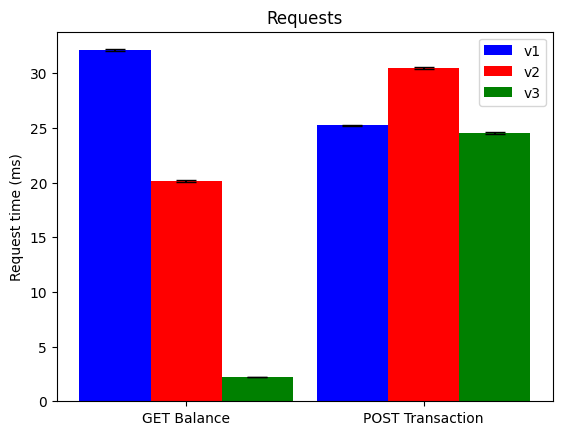

In [9]:
plt.title('Requests')

barWidth = 0.3
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, [np.average(v1GetMetrics), np.average(v1PostMetrics)], width = barWidth, color = 'blue', yerr=[v1GetDifference, v1PostDifference], capsize=7, label='v1')
plt.bar(r2, [np.average(v2GetMetrics), np.average(v2PostMetrics)], width = barWidth, color = 'red', yerr=[v2GetDifference, v2PostDifference], capsize=7, label='v2')
plt.bar(r3, [np.average(v3GetMetrics), np.average(v3PostMetrics)], width = barWidth, color = 'green', yerr=[v3GetDifference, v3PostDifference], capsize=7, label='v3')

plt.xticks([r + barWidth for r in range(2)], ['GET Balance', 'POST Transaction'])

plt.ylabel("Request time (ms)")
plt.legend()
plt.show()

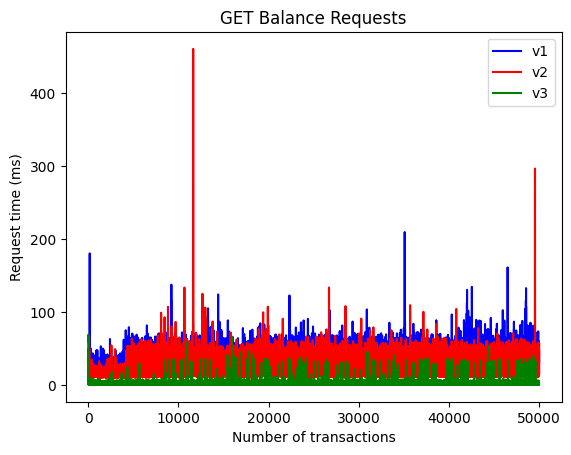

In [10]:
plt.title('GET Balance Requests')

plt.xlabel("Number of transactions")
plt.ylabel("Request time (ms)")

plt.plot([i for i in range(len(v1GetMetrics))], v1GetMetrics, color="blue", label='v1')

plt.plot([i for i in range(len(v2GetMetrics))], v2GetMetrics, color="red", label='v2')

plt.plot([i for i in range(len(v3GetMetrics))], v3GetMetrics, color="green", label='v3')

plt.legend()
plt.show()

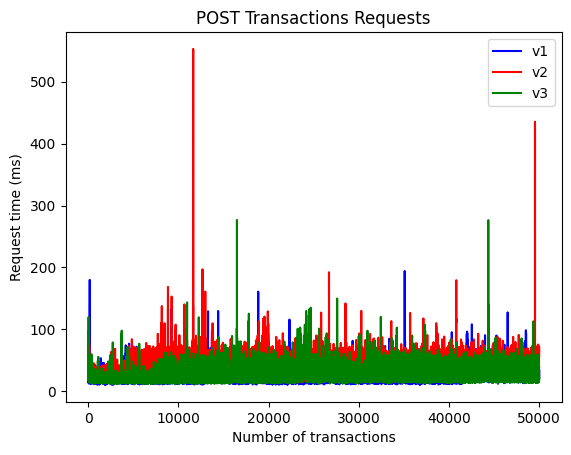

In [12]:
plt.title('POST Transactions Requests')

plt.xlabel("Number of transactions")
plt.ylabel("Request time (ms)")

plt.plot([i for i in range(len(v1PostMetrics))], v1PostMetrics, color="blue", label='v1')

plt.plot([i for i in range(len(v2PostMetrics))], v2PostMetrics, color="red", label='v2')

plt.plot([i for i in range(len(v3PostMetrics))], v3PostMetrics, color="green", label='v3')

plt.legend()
plt.show()